**The Perceptron class**




In [10]:
import numpy as np
'''Basic perceptron classifier'''


class Perceptron(object):
  '''
  ---------Parameters--------
  eta: float - learning rate 0<eta<1
  iter_number: int - iteration over dataset
  random_state: int - RNG seed
  ---------Attributes--------
  w_: ld-array - weights after fitting
  errs_ : list - number of misclassifications for each epoch
  '''
  def __init__(self, eta=0.01, iter_number=100, random_state=1):
    self.eta = eta
    self.iter_number = iter_number
    self.random_state = random_state
  def fit(self, x, y):
    '''
    Fit the data
    The meat of the perceptron
    -------Parameters---------
    x: array-like, shape = {n_examples, n_features}
    Training vectors
    n_examples - the number of examples
    n_features - the number of distinct features
    y: array-like, shape = {n_examples}
    Target value vector
    ---------Return-----------
    self: object
    '''
    rstate = np.random.RandomState(self.random_state)
    self.w_ = rstate.normal(loc = 0.0, scale = 0.01, size = 1 + x.shape[1]) # Initalize weights to a number close to 0
    self.errs_ = [] 
    for _ in range(self.iter_number):
      errs = 0
      for xi, target in zip(x,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update # This is theta
        errs += int(update != 0.0)
      self.errs_.append(errs)
    return self
  def net_input(self, x):
    '''
    Calculates the net input function FI(z)
    '''
    return np.dot(x, self.w_[1:]) + self.w_[0] # x dot w_
  def predict(self, X):
    '''
    Predicts class label in unit steps
    '''
    return np.where(self.net_input(X)>= 0.0, 1, -1)



**Importing the Iris dataset**

In [5]:
import os
import pandas as pd
a = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
df = pd.read_csv(a, header=None, encoding='utf-8')
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


**Preparing the data + Visualisation**

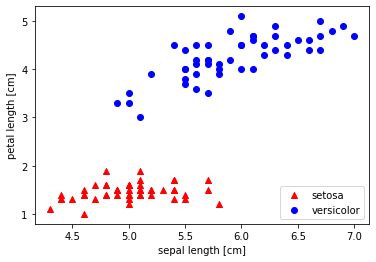

In [8]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0,2]].values

plt.scatter(x[:50, 0], x[:50,1], color = 'red', marker='^', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker = 'o', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

**Testing the convergence of our perceptron**

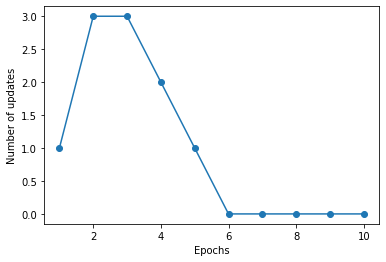

In [11]:
perc = Perceptron(eta = 0.1, iter_number = 10)
perc.fit(x, y)
plt.plot(range(1, len(perc.errs_) + 1), perc.errs_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


**Plot the decision surfaces using prediction for every possible choice**

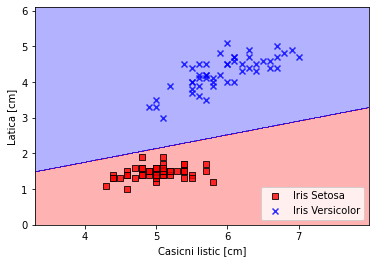

In [58]:

def plot_decision_regions(x,y, classifier, resolution = 0.02):
  from matplotlib.colors import ListedColormap

  # Marker generator + color map
  markers = ('s', 'x', 'o', '^', 'y')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # Plot decision surfaces
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # Plot examples
  for idx, cl in enumerate(np.unique(y)):
    c = "Iris Versicolor" if cl == 1 else "Iris Setosa"
    plt.scatter(x = x[y==cl, 0], y = x[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = c,
                edgecolor='black')
  #plt.show()
plot_decision_regions(x,y, perc, resolution=0.01)
plt.xlabel('Casicni listic [cm]')
plt.ylabel('Latica [cm]')
plt.legend(loc = 'lower right')
plt.show()

**Tests**


In [65]:
test = [1, 4]
test = np.array(test)
z = perc.predict(test.T)
c = "Iris Versicolor" if z == 1 else "Iris Setosa"

print(c)

Iris Versicolor
